In [1]:
import pandas as pd 

df = pd.read_csv("data/ldw_2023_pilot_coding_tasks_outputs_processed_2.csv")

### Learning task 1 - RobotArm

In [2]:
robotarm_df = df[df['Activity Name'] == 'RobotArm']
robotarm_l1 = robotarm_df[robotarm_df['Activity ID'] == "P1M120"]
key_vector_l1 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"

In [3]:
robotarm_l1_grouped = robotarm_l1.groupby('Student ID').apply(lambda x: 1 in x['WorldspaceScore'].values)

# separate the students into two groups
success_students_l1 = robotarm_l1_grouped[robotarm_l1_grouped == True].index
failure_students_l1 = robotarm_l1_grouped[robotarm_l1_grouped == False].index

In [4]:
robotarm_l1_success = robotarm_l1[robotarm_l1['Student ID'].isin(success_students_l1)]
robotarm_l1_failure = robotarm_l1[robotarm_l1['Student ID'].isin(failure_students_l1)]

In [6]:
# for successful students
robotarm_l1_success = robotarm_l1_success.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l1_success = robotarm_l1_success.dropna(subset=['WorldSpace'])
robotarm_l1_success['index'] = robotarm_l1_success.groupby('Student ID').cumcount()

In [7]:
# for unsuccessful students
robotarm_l1_failure = robotarm_l1_failure.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l1_failure = robotarm_l1_failure.dropna(subset=['WorldSpace'])
robotarm_l1_failure['index'] = robotarm_l1_failure.groupby('Student ID').cumcount()

In [8]:
from distances import * 

initial_worldspace = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,false']"
initial_distance = euclidean(initial_worldspace, key_vector_l1)

robotarm_l1_success['euclidean_distance'] = robotarm_l1_success['WorldSpace'].apply(lambda x: euclidean(x, key_vector_l1))
robotarm_l1_failure['euclidean_distance'] = robotarm_l1_failure['WorldSpace'].apply(lambda x: euclidean(x, key_vector_l1))

/Users/ajkunaseipi/Documents/MA4/Semester project/PISA/distances.py:368: RuntimeWarning: invalid value encountered in scalar divide
  tot_distance = (normalized_distance_A + normalized_distance_B) / count


In [9]:
data_success = robotarm_l1_success[["Student ID", "WorldSpace", "index", "euclidean_distance"]]

# dictionnary to reassign index to the correct order, where index 0 becomes 1 and index 1 becomes 2
index_dict = {i: i+1 for i in range(len(data_success['index'].unique()))}

data_success['index'] = data_success['index'].apply(lambda x: index_dict[x])

initial_data = pd.DataFrame({'Student ID': data_success['Student ID'].unique(), 'WorldSpace': initial_worldspace, 'index': 0, 'euclidean_distance': initial_distance})
data_success = pd.concat([data_success, initial_data])

data_success = data_success.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='index')).reset_index(drop=True)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_48454/79794832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_success['index'] = data_success['index'].apply(lambda x: index_dict[x])


In [10]:
data_fail = robotarm_l1_failure[["Student ID", "WorldSpace", "index", "euclidean_distance"]]

# dictionnary to reassign index to the correct order, where index 0 becomes 1 and index 1 becomes 2
index_dict = {i: i+1 for i in range(len(data_fail['index'].unique()))}

initial_data = pd.DataFrame({'Student ID': data_fail['Student ID'].unique(), 'WorldSpace': initial_worldspace, 'index': 0, 'euclidean_distance': initial_distance})
data_fail['index'] = data_fail['index'].apply(lambda x: index_dict[x])

data_fail = pd.concat([data_fail, initial_data])

data_fail = data_fail.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='index')).reset_index(drop=True)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_48454/2902755099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fail['index'] = data_fail['index'].apply(lambda x: index_dict[x])


In [11]:
data_success['index normalized'] = data_success['index'] / data_success.groupby('Student ID')['index'].transform('max')
data_fail['index normalized'] = data_fail['index'] / data_fail.groupby('Student ID')['index'].transform('max')

In [5]:
nb_student = len(robotarm_l1['Student ID'].unique())
print(f"Number of students: {nb_student}")

nb_success_students = len(data_success['Student ID'].unique())
print(f"Number of successful students: {nb_success_students}")

nb_fail_students = len(data_fail['Student ID'].unique())
print(f"Number of failing students: {nb_fail_students}")

Number of students: 386
Number of successful students: 263
Number of failing students: 123


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


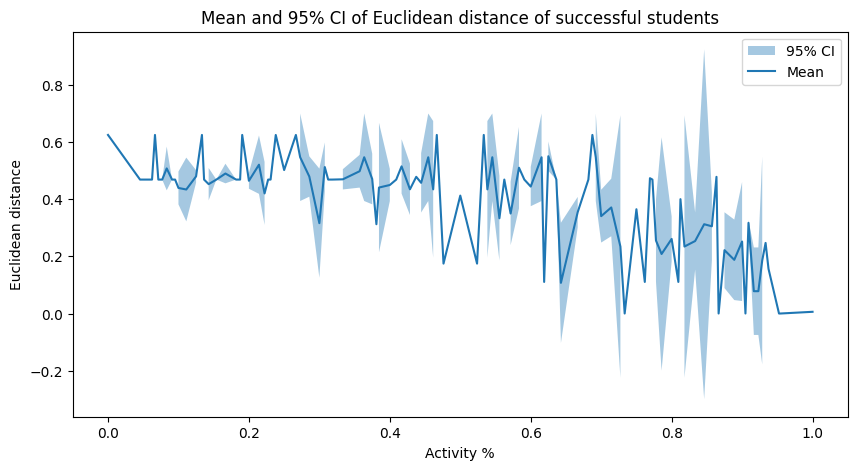

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# plot one figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


grouped = data_success.groupby("index normalized")

# Calculate mean and 95% CI for "Jaro bars" metric
mean_values_bars = grouped["euclidean_distance"].mean()
ci_values_bars = grouped["euclidean_distance"].apply(lambda x: stats.sem(x, nan_policy='omit') * 1.96)  # 95% CI

# Fill between upper and lower CI
ax.fill_between(mean_values_bars.index, mean_values_bars - ci_values_bars, mean_values_bars + ci_values_bars, alpha=0.4, label="95% CI")

ax.plot(mean_values_bars.index, mean_values_bars, linestyle='-', label="Mean")
ax.set_xlabel("Activity %")
ax.set_ylabel("Euclidean distance")
ax.set_title("Mean and 95% CI of Euclidean distance of successful students")
ax.legend()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,


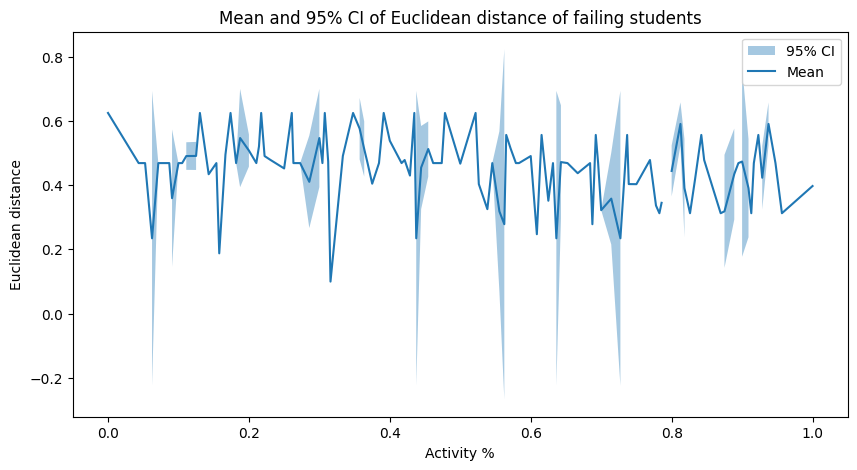

In [13]:
# plot one figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


grouped = data_fail.groupby("index normalized")

# Calculate mean and 95% CI for "Jaro bars" metric
mean_values_bars = grouped["euclidean_distance"].mean()
ci_values_bars = grouped["euclidean_distance"].apply(lambda x: stats.sem(x, nan_policy='omit') * 1.96)  # 95% CI

# Fill between upper and lower CI
ax.fill_between(mean_values_bars.index, mean_values_bars - ci_values_bars, mean_values_bars + ci_values_bars, alpha=0.4, label="95% CI")

ax.plot(mean_values_bars.index, mean_values_bars, linestyle='-', label="Mean")
ax.set_xlabel("Activity %")
ax.set_ylabel("Euclidean distance")
ax.set_title("Mean and 95% CI of Euclidean distance of failing students")
ax.legend()

plt.show()

In [14]:
data_success.describe()

,index,euclidean_distance,index normalized
count,1483.000000,1483.000000,1483.00000
mean,3.290627,0.372550,0.50000
std,3.321884,0.252495,0.35117
min,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.20000
50%,2.000000,0.468521,0.50000
75%,5.000000,0.624695,0.80000
max,22.000000,0.624695,1.00000


In [15]:
data_fail.describe()

,index,euclidean_distance,index normalized
count,599.000000,598.000000,599.000000
mean,4.028381,0.468904,0.500000
std,4.220613,0.170942,0.358195
min,0.000000,0.000000,0.000000
25%,1.000000,0.468521,0.166667
50%,3.000000,0.468521,0.500000
75%,6.000000,0.624695,0.833333
max,23.000000,0.624695,1.000000


In [16]:
data_fail

,Student ID,WorldSpace,index,euclidean_distance,index normalized
0,AUS123109,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",0,0.624695,0.000000
1,AUS123109,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",1,0.321960,0.500000
2,AUS123109,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",2,0.000000,1.000000
3,AUS123397,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",0,0.624695,0.000000
4,AUS123397,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",1,0.468521,0.071429
...,...,...,...,...,...
594,NOR751026,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",6,0.321960,0.600000
595,NOR751026,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",7,0.321960,0.700000
596,NOR751026,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",8,0.321960,0.800000
597,NOR751026,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",9,0.624695,0.900000


<Axes: >

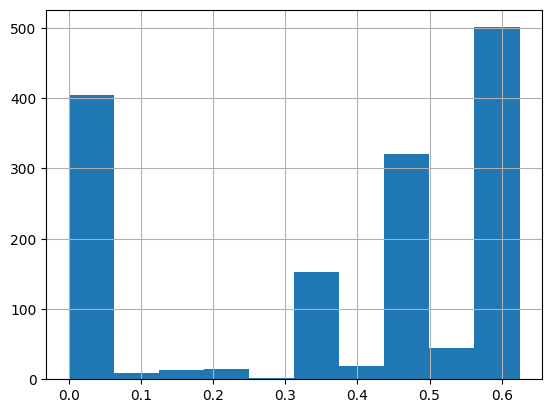

In [17]:
data_success['euclidean_distance'].hist()

<Axes: >

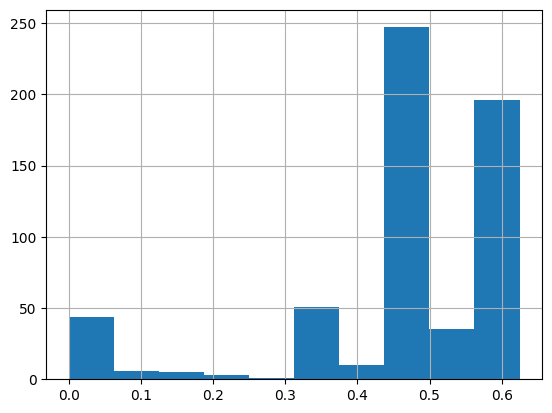

In [18]:
data_fail['euclidean_distance'].hist()

* Not the same number of succesful and failing students => what to do for comparision? 
* Comparing the evolution between succecsive runs: difference of percentage between first and second run => make a mean for each normalized index and plot it 
* Observe some pointwise students => observe the behaviors and compare between successful ones and unsuccessful ones 

In [19]:
data_success['pct_change'] = data_success['euclidean_distance'].pct_change()

In [20]:
data_success

,Student ID,WorldSpace,index,euclidean_distance,index normalized,pct_change
0,AUS123001,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",0,0.624695,0.00,NaN
1,AUS123001,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",1,0.468521,0.25,-0.250000
2,AUS123001,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",2,0.400047,0.50,-0.146149
3,AUS123001,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",3,0.156174,0.75,-0.609612
4,AUS123001,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",4,0.000000,1.00,-1.000000
...,...,...,...,...,...,...
1478,UK123025,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",0,0.624695,0.00,inf
1479,UK123025,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",1,0.468521,0.25,-0.250000
1480,UK123025,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",2,0.000000,0.50,-1.000000
1481,UK123025,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,...",3,0.000000,0.75,NaN


In [21]:
data_success = data_success[data_success['index'] != 0]

In [22]:
data_success['pct_change'].unique()

array([-0.25      , -0.14614906, -0.6096118 , -1.        ,  0.33333333,
        0.        ,         nan, -0.6       ,  1.96796068, -0.42116461,
        0.18718427,         inf, -0.31281573,  0.940285  , -0.4846118 ,
       -0.1096118 ,  0.12310563, -0.47295372, -0.1951941 ,  7.        ,
       -0.5       , -0.627322  ,  2.57770876, -0.7       ,  0.25      ,
        0.0205176 ,  0.30652654, -0.32663163, -0.33333333, -0.13962039,
        0.37983776, -0.15767078, -0.37313175, -0.28077641,  0.72760688,
       -0.76429774, -0.2346118 , -0.30628706, -0.0094112 , -0.19371294,
        0.24025307, -0.22514823, -0.44098301, -0.60471529,  0.45521375,
       -0.16331582,  0.56155281,  0.16331582, -0.43844719,  0.16227766,
        0.1951941 , -0.0201051 , -0.75      ,  1.56155281, -0.36754447,
       -0.66666667, -0.03898771,  0.5       , -0.23303501, -0.34673673,
       -0.65700283])

In [23]:
import math
# As we observe NaN and inf values => remove them or replace them ? 
data_success = data_success.dropna(subset=['pct_change'])
data_success = data_success[data_success['pct_change'] != math.inf]

In [24]:
data_success['pct_change'].unique()

array([-0.25      , -0.14614906, -0.6096118 , -1.        ,  0.33333333,
        0.        , -0.6       ,  1.96796068, -0.42116461,  0.18718427,
       -0.31281573,  0.940285  , -0.4846118 , -0.1096118 ,  0.12310563,
       -0.47295372, -0.1951941 ,  7.        , -0.5       , -0.627322  ,
        2.57770876, -0.7       ,  0.25      ,  0.0205176 ,  0.30652654,
       -0.32663163, -0.33333333, -0.13962039,  0.37983776, -0.15767078,
       -0.37313175, -0.28077641,  0.72760688, -0.76429774, -0.2346118 ,
       -0.30628706, -0.0094112 , -0.19371294,  0.24025307, -0.22514823,
       -0.44098301, -0.60471529,  0.45521375, -0.16331582,  0.56155281,
        0.16331582, -0.43844719,  0.16227766,  0.1951941 , -0.0201051 ,
       -0.75      ,  1.56155281, -0.36754447, -0.66666667, -0.03898771,
        0.5       , -0.23303501, -0.34673673, -0.65700283])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


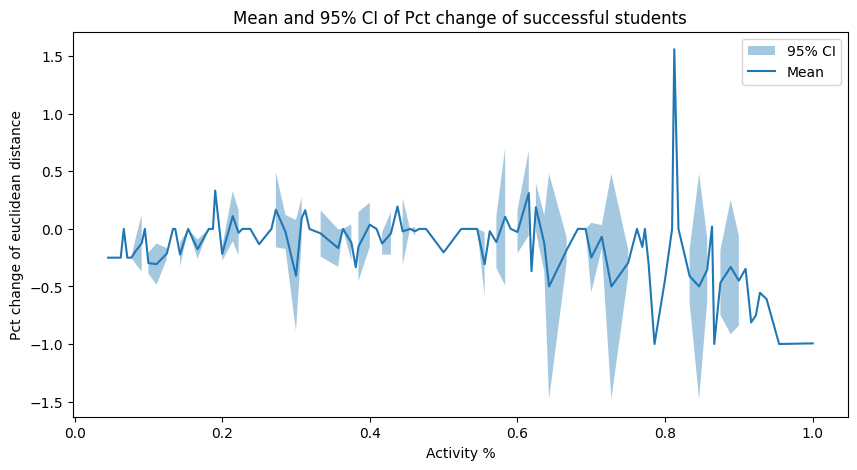

In [25]:
# plot one figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


grouped_success = data_success.groupby("index normalized")

# Calculate mean and 95% CI for "Jaro bars" metric
mean_values_bars_success = grouped_success["pct_change"].mean()
ci_values_bars_success = grouped_success["pct_change"].apply(lambda x: stats.sem(x, nan_policy='omit') * 1.96)  # 95% CI

# Fill between upper and lower CI
ax.fill_between(mean_values_bars_success.index, mean_values_bars_success - ci_values_bars_success, mean_values_bars_success + ci_values_bars_success, alpha=0.4, label="95% CI")

ax.plot(mean_values_bars_success.index, mean_values_bars_success, linestyle='-', label="Mean")
ax.set_xlabel("Activity %")
ax.set_ylabel("Pct change of euclidean distance")
ax.set_title("Mean and 95% CI of Pct change of successful students")
ax.legend()

plt.show()

In [26]:
data_fail['pct_change'] = data_fail['euclidean_distance'].pct_change()

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_48454/1125070195.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  data_fail['pct_change'] = data_fail['euclidean_distance'].pct_change()


In [27]:
import math

data_fail = data_fail[data_fail['index'] != 0]
data_fail = data_fail.dropna(subset=['pct_change'])
data_fail = data_fail[data_fail['pct_change'] != math.inf]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


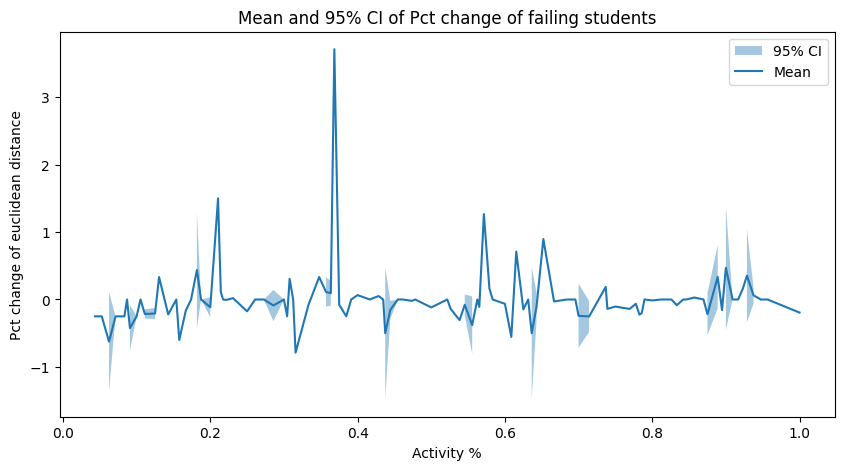

In [28]:
# plot one figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


grouped_fail = data_fail.groupby("index normalized")

# Calculate mean and 95% CI for "Jaro bars" metric
mean_values_bars_fail = grouped_fail["pct_change"].mean()
ci_values_bars_fail = grouped_fail["pct_change"].apply(lambda x: stats.sem(x, nan_policy='omit') * 1.96)  # 95% CI

# Fill between upper and lower CI
ax.fill_between(mean_values_bars_fail.index, mean_values_bars_fail - ci_values_bars_fail, mean_values_bars_fail + ci_values_bars_fail, alpha=0.4, label="95% CI")

ax.plot(mean_values_bars_fail.index, mean_values_bars_fail, linestyle='-', label="Mean")
ax.set_xlabel("Activity %")
ax.set_ylabel("Pct change of euclidean distance")
ax.set_title("Mean and 95% CI of Pct change of failing students")
ax.legend()

plt.show()

In [29]:
mean_values_bars_fail.index.unique()

Index([0.043478260869565216,  0.05263157894736842,               0.0625,
        0.07142857142857142,  0.07692307692307693,  0.08333333333333333,
        0.08695652173913043,  0.09090909090909091,                  0.1,
        0.10526315789473684,
       ...
                        0.9,   0.9090909090909091,   0.9130434782608695,
         0.9166666666666666,   0.9230769230769231,   0.9285714285714286,
                     0.9375,   0.9473684210526315,   0.9565217391304348,
                        1.0],
      dtype='float64', name='index normalized', length=112)

* What is the difference in behavior from the students ? 
* At which point, the difference in behavior does not follow the same line (in average) ? 

In [30]:
import numpy as np 

index_success = set(mean_values_bars_success.index)
index_fail = set(mean_values_bars_fail.index)

In [31]:
index_both = index_success.intersection(index_fail)

In [32]:
index_both = list(index_both)

In [33]:
diff_success = mean_values_bars_success[mean_values_bars_success.index.isin(index_both)]
diff_fail = mean_values_bars_fail[mean_values_bars_fail.index.isin(index_both)]

In [34]:
mean_diff = diff_success.copy()

mean_diff = diff_fail - diff_success

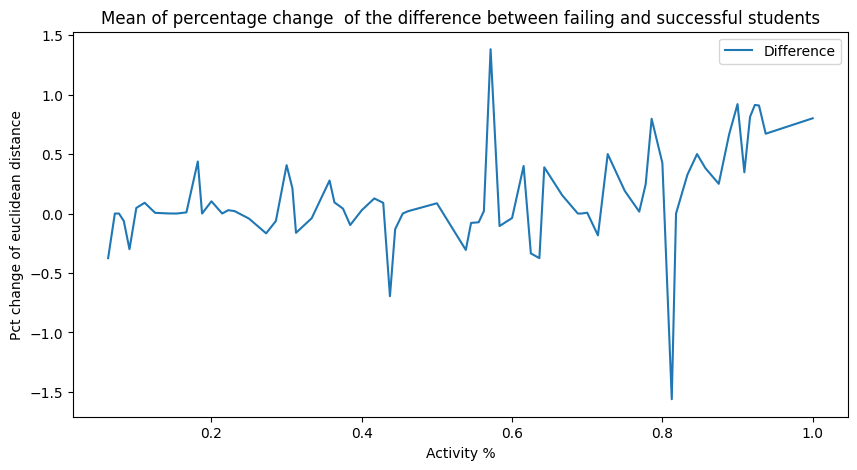

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


#ax.plot(mean_values_bars_fail.index, mean_values_bars_fail, linestyle='--', label="Mean fail")
#ax.plot(mean_values_bars_success.index, mean_values_bars_success, linestyle='--', label="Mean success")
ax.plot(mean_diff.index, mean_diff, linestyle='-', label="Difference")

ax.set_xlabel("Activity %")
ax.set_ylabel("Pct change of euclidean distance")
ax.set_title("Mean of percentage change  of the difference between failing and successful students")
ax.legend()

plt.show()

### Histograms 

In [38]:
# for each student, keep only the last row 
data_success_max_tentative = data_success.groupby('Student ID').tail(1)
data_fail_max_tentative = data_fail.groupby('Student ID').tail(1)

In [83]:
data_fail_max_tentative[data_fail_max_tentative['euclidean_distance'] == 0][['Student ID', 'WorldSpace']]

,Student ID,WorldSpace
2,AUS123109,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,..."
47,AUS123757,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,..."
51,AUS128470,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,..."
69,AUS128758,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,..."
74,AUS128794,"[""[{'trial': 8, 'planet': 'C', 'power-level-la..."
90,AUS163471,"[""[{'trial': 1, 'planet': 'E', 'gravity': 20, ..."
126,AUS184256,"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,..."
158,AUS214725,"[""[{'trial': 4, 'planet': '-', 'power-level-la..."
161,AUS214761,"[""[{'trial': 1, 'planet': 'B', 'atmosphere': 2..."
163,AUS214797,"[""[{'trial': 14, 'planet': 'A', 'power-level-l..."


In [68]:
data_fail_max_tentative[data_fail_max_tentative['euclidean_distance'] == 0]['WorldSpace'][90]

'["[{\'trial\': 1, \'planet\': \'E\', \'gravity\': 20, \'atmosphere\': 3, \'parachute\': \'no\', \'power-level-landing\': \'0.7\', \'landing-speed\': 45}]"]'

In [61]:
key_vector_l1

"['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"

In [60]:
vector = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"

euclidean(vector, key_vector_l1)

0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

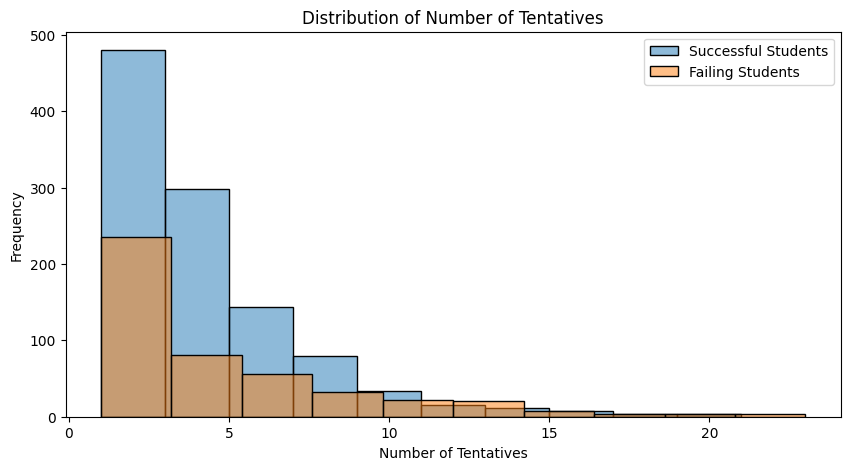

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

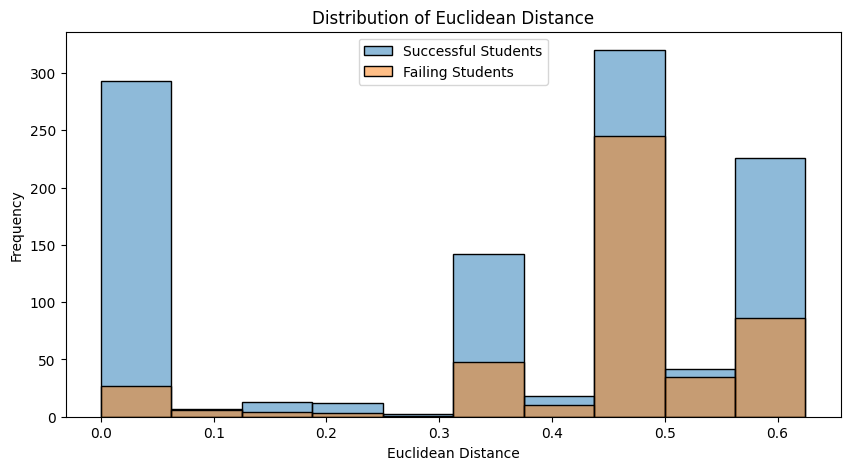

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a pandas DataFrame called 'data'
tentatives_successful = data_success['index']
euclidean_distance_successful = data_success['euclidean_distance']

tentatives_failing = data_fail['index']
euclidean_distance_failing = data_fail['euclidean_distance']

# Create histograms for the number of tentatives
plt.figure(figsize=(10, 5))
sns.histplot(tentatives_successful, bins=10, label='Successful Students', alpha=0.5)
sns.histplot(tentatives_failing, bins=10, label='Failing Students', alpha=0.5)
plt.xlabel('Number of Tentatives')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tentatives')
plt.legend()
plt.show()

# Create histograms for the Euclidean distance
plt.figure(figsize=(10, 5))
sns.histplot(euclidean_distance_successful, bins=10, label='Successful Students', alpha=0.5)
sns.histplot(euclidean_distance_failing, bins=10, label='Failing Students', alpha=0.5)
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distance')
plt.legend()
plt.show()


* How to penalize an error ? => find a penality, or simply penalize it by the number of missing elements (since it is correlated)
* Clean the data => some WorldSpace are not correct => characters to NOT have "{" or "trial" or "\"
* How many students finish the task with errors ? Are stuck in errors ? 
* How many errors between failing and successful students ? 

In [69]:
def is_error(worldspace):
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeA", "A")
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeB", "B")
    worldspace = ast.literal_eval(worldspace)
    
    matrix = []
    for i in range(len(worldspace)):
        matrix.append(worldspace[i].split(','))
        
    return matrix[-1][-1] != 'false'

In [70]:
data_success['error'] = data_success['WorldSpace'].apply(lambda x: is_error(x))
data_fail['error'] = data_fail['WorldSpace'].apply(lambda x: is_error(x))

In [72]:
# transform the error column into a binary column
data_success['error'] = data_success['error'].apply(lambda x: 1 if x == True else 0)
data_fail['error'] = data_fail['error'].apply(lambda x: 1 if x == True else 0)

In [89]:
faulty_v = '["[{\'trial\': 1, \'planet\': \'E\', \'gravity\': 20, \'atmosphere\': 3, \'parachute\': \'no\', \'power-level-landing\': \'0.7\', \'landing-speed\': 45}]"]'

# if the character { or } or \ is present in the string, then print "Fault"
if "trial" in faulty_v:
    print("Fault")

Fault


In [90]:
# remove the rows where the WorldSpace contains "trial"
data_fail = data_fail[~data_fail['WorldSpace'].str.contains("trial")]

In [92]:
data_success = data_success[~data_success['WorldSpace'].str.contains("trial")]

In [93]:
# for each student, keep only the last row 
data_success_max_tentative = data_success.groupby('Student ID').tail(1)
data_fail_max_tentative = data_fail.groupby('Student ID').tail(1)

# Overall analysis 

In [183]:
import pandas as pd 

df = pd.read_csv("data/ldw_2023_pilot_coding_tasks_outputs_processed_2.csv")

In [184]:
robotarm_df = df[df['Activity Name'] == 'RobotArm']
robotarm_l1 = robotarm_df[robotarm_df['Activity ID'] == "P1M120"]
key_vector_l1 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"

### Separate the successful and failing students

In [185]:
robotarm_l1_grouped = robotarm_l1.groupby('Student ID').apply(lambda x: 1 in x['WorldspaceScore'].values)

# separate the students into two groups
success_students_l1 = robotarm_l1_grouped[robotarm_l1_grouped == True].index
failure_students_l1 = robotarm_l1_grouped[robotarm_l1_grouped == False].index

In [186]:
robotarm_l1_success = robotarm_l1[robotarm_l1['Student ID'].isin(success_students_l1)]
robotarm_l1_failure = robotarm_l1[robotarm_l1['Student ID'].isin(failure_students_l1)]

In [187]:
# check if students in success data are NOT in fail data 
set(success_students_l1.intersection(failure_students_l1)) == set()

True

### Cleaning the data

In [188]:
# remove rows where there is NaN value in the WorldSpace column
robotarm_l1_success = robotarm_l1_success.dropna(subset=['WorldSpace'])
robotarm_l1_failure = robotarm_l1_failure.dropna(subset=['WorldSpace'])

In [189]:
# remove the rows where the WorldSpace contains "trial"
robotarm_l1_failure = robotarm_l1_failure[~robotarm_l1_failure['WorldSpace'].str.contains("trial")]
robotarm_l1_success = robotarm_l1_success[~robotarm_l1_success['WorldSpace'].str.contains("trial")]

### Index the tentatives

In [190]:
# for successful students
robotarm_l1_success = robotarm_l1_success.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l1_success = robotarm_l1_success.dropna(subset=['WorldSpace'])
robotarm_l1_success['index'] = robotarm_l1_success.groupby('Student ID').cumcount()

In [191]:
# for unsuccessful students
robotarm_l1_failure = robotarm_l1_failure.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='timestamp')).reset_index(drop=True)
robotarm_l1_failure = robotarm_l1_failure.dropna(subset=['WorldSpace'])
robotarm_l1_failure['index'] = robotarm_l1_failure.groupby('Student ID').cumcount()

### Compute euclidean distance

In [192]:
from distances import * 

initial_worldspace = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,false']"
initial_distance = euclidean(initial_worldspace, key_vector_l1)

robotarm_l1_success['euclidean_distance'] = robotarm_l1_success['WorldSpace'].apply(lambda x: euclidean(x, key_vector_l1))
robotarm_l1_failure['euclidean_distance'] = robotarm_l1_failure['WorldSpace'].apply(lambda x: euclidean(x, key_vector_l1))

/Users/ajkunaseipi/Documents/MA4/Semester project/PISA/distances.py:385: RuntimeWarning: invalid value encountered in scalar divide
  tot_distance = (normalized_distance_A + normalized_distance_B) / count


* When computin the euclidean distance: for the tentative where the student has commited an error, we penalize it by adding 0.1 to the total distance (to be changed)
* How to penalize an error? 
1. By assigning it the initial distance 
2. By assigning a predefined penalty score
3. By assigning the previous non-error euclidean distance 

### Add initial vector and distance for each student

In [193]:
data_success = robotarm_l1_success[["Student ID", "WorldSpace", "index", "euclidean_distance"]]

# dictionnary to reassign index to the correct order, where index 0 becomes 1 and index 1 becomes 2
index_dict = {i: i+1 for i in range(len(data_success['index'].unique()))}

data_success['index'] = data_success['index'].apply(lambda x: index_dict[x])

initial_data = pd.DataFrame({'Student ID': data_success['Student ID'].unique(), 'WorldSpace': initial_worldspace, 'index': 0, 'euclidean_distance': initial_distance})
data_success = pd.concat([data_success, initial_data])

data_success = data_success.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='index')).reset_index(drop=True)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_54234/79794832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_success['index'] = data_success['index'].apply(lambda x: index_dict[x])


In [194]:
data_fail = robotarm_l1_failure[["Student ID", "WorldSpace", "index", "euclidean_distance"]]

# dictionnary to reassign index to the correct order, where index 0 becomes 1 and index 1 becomes 2
index_dict = {i: i+1 for i in range(len(data_fail['index'].unique()))}

initial_data = pd.DataFrame({'Student ID': data_fail['Student ID'].unique(), 'WorldSpace': initial_worldspace, 'index': 0, 'euclidean_distance': initial_distance})
data_fail['index'] = data_fail['index'].apply(lambda x: index_dict[x])

data_fail = pd.concat([data_fail, initial_data])

data_fail = data_fail.groupby('Student ID', as_index=False).apply(lambda x: x.sort_values(by='index')).reset_index(drop=True)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_54234/2902755099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fail['index'] = data_fail['index'].apply(lambda x: index_dict[x])


### Create column corresponding to percentage of activity completed

In [195]:
data_success['pct_activity'] = data_success['index'] / data_success.groupby('Student ID')['index'].transform('max')
data_fail['pct_activity'] = data_fail['index'] / data_fail.groupby('Student ID')['index'].transform('max')

In [196]:
nb_student = len(robotarm_l1['Student ID'].unique())
print(f"Number of students: {nb_student}")

nb_success_students = len(data_success['Student ID'].unique())
print(f"Number of successful students: {nb_success_students}")

nb_fail_students = len(data_fail['Student ID'].unique())
print(f"Number of failing students: {nb_fail_students}")

Number of students: 386
Number of successful students: 263
Number of failing students: 107


In [197]:
# create column max tentative which correspond to the last row column "index" for each student
data_success["nb_tentative"] = data_success.groupby('Student ID')['index'].transform('max')
data_fail["nb_tentative"] = data_fail.groupby('Student ID')['index'].transform('max')

### Create column to indicate if the student made an error or not during the tentative

In [198]:
def is_error(worldspace):
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeA", "A")
    worldspace = worldspace.replace("ra-world-shape ra-world-shapeB", "B")
    worldspace = ast.literal_eval(worldspace)
    
    matrix = []
    for i in range(len(worldspace)):
        matrix.append(worldspace[i].split(','))
        
    return matrix[-1][-1] != 'false'

In [199]:
data_success['error'] = data_success['WorldSpace'].apply(lambda x: is_error(x))
data_fail['error'] = data_fail['WorldSpace'].apply(lambda x: is_error(x))

In [200]:
# transform the error column into a binary column
data_success['error'] = data_success['error'].apply(lambda x: 1 if x == True else 0)
data_fail['error'] = data_fail['error'].apply(lambda x: 1 if x == True else 0)

In [201]:
data_success["nb_error"] = data_success.groupby('Student ID')['error'].transform('sum')
data_fail["nb_error"] = data_fail.groupby('Student ID')['error'].transform('sum')

### Add column of difference in the euclidean distance between previous row and successive row

In [205]:
data_success['delta'] = data_success['euclidean_distance'].diff()
data_success = data_success.dropna(subset=['delta'])

data_fail['delta'] = data_fail['euclidean_distance'].diff()
data_fail = data_fail.dropna(subset=['delta'])

### Add column for percentage of error over number of total tentatives 


In [206]:
data_success['pct_error'] = data_success['nb_error'] / data_success['nb_tentative']
data_fail['pct_error'] = data_fail['nb_error'] / data_fail['nb_tentative']

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_54234/2614019748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_success['pct_error'] = data_success['nb_error'] / data_success['nb_tentative']


# Analysis 

In [208]:
data_success[['index', 'nb_tentative', 'delta', 'pct_activity']].describe()

,index,nb_tentative,delta,pct_activity
count,1479.000000,1479.000000,1479.000000,1479.000000
mean,3.288032,6.573360,0.000068,0.500338
std,3.321446,4.360279,0.381783,0.351250
min,0.000000,1.000000,-0.724695,0.000000
25%,1.000000,4.000000,-0.156174,0.200000
50%,2.000000,5.000000,0.000000,0.500000
75%,5.000000,8.000000,0.156174,0.800000
max,22.000000,22.000000,0.724695,1.000000


In [209]:
data_fail[['index', 'nb_tentative', 'delta', 'pct_activity']].describe()

,index,nb_tentative,delta,pct_activity
count,575.000000,575.000000,575.000000,575.000000
mean,3.857391,7.753043,-0.000913,0.499771
std,4.085819,5.649293,0.176266,0.360139
min,0.000000,1.000000,-0.624695,0.000000
25%,1.000000,3.000000,-0.156174,0.166667
50%,3.000000,7.000000,0.000000,0.500000
75%,6.000000,10.000000,0.100000,0.833333
max,23.000000,23.000000,0.524695,1.000000


### Euclidean distance

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

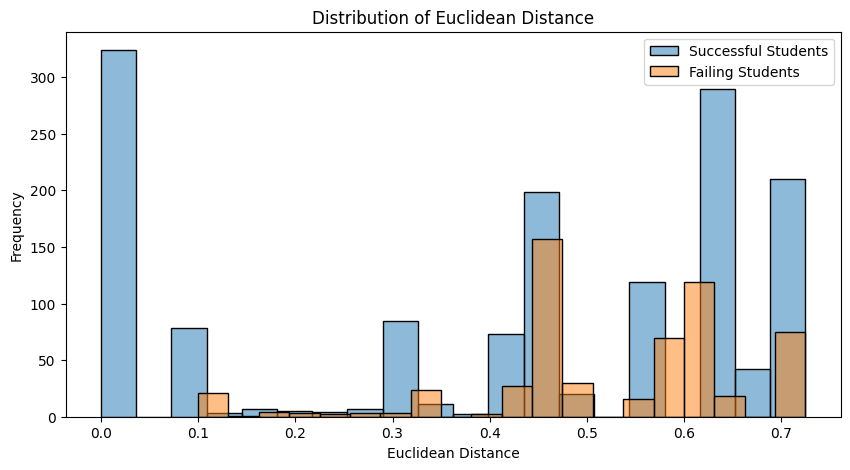

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

euclidean_distance_successful = data_success['euclidean_distance']
euclidean_distance_failing = data_fail['euclidean_distance']

# Create histograms for the Euclidean distance
plt.figure(figsize=(10, 5))
sns.histplot(euclidean_distance_successful, bins=20, label='Successful Students', alpha=0.5)
sns.histplot(euclidean_distance_failing, bins=20, label='Failing Students', alpha=0.5)
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distance')
plt.legend()
plt.show()

In [211]:
data_success['success'] = 1
data_fail['success'] = 0

data = pd.concat([data_success, data_fail])

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_54234/1419184903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_success['success'] = 1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


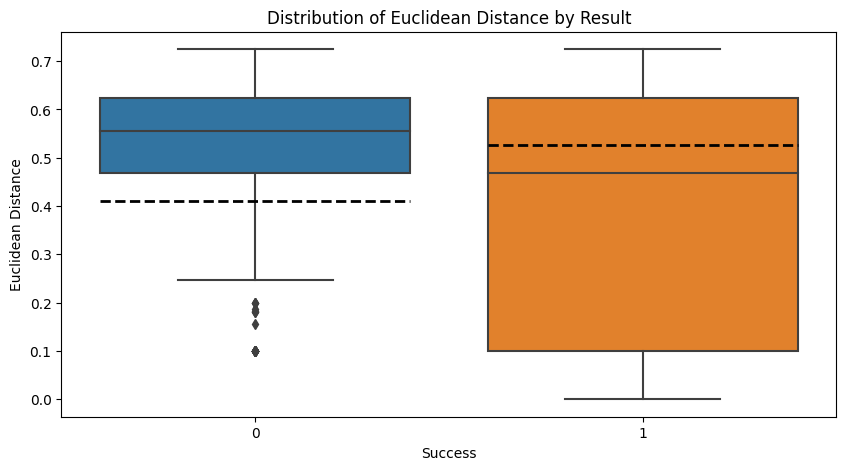

In [212]:
# Create box plots for the Euclidean distance
plt.figure(figsize=(10, 5))
sns.boxplot(x='success', y='euclidean_distance', data=data)

mean_successful = data_success['euclidean_distance'].mean()
mean_failing = data_fail['euclidean_distance'].mean()

plt.plot([-0.4, 0.4], [mean_successful, mean_successful], color='black', linestyle='--', linewidth=2, label='Mean Successful')
plt.plot([0.6, 1.4], [mean_failing, mean_failing], color='black', linestyle='--', linewidth=2, label='Mean Failing')


plt.xlabel('Success')
plt.ylabel('Euclidean Distance')
plt.title('Distribution of Euclidean Distance by Result')
plt.show()


In [213]:
from scipy.stats import mannwhitneyu

# Assuming 'euclidean_distance_successful' and 'euclidean_distance_failing' are arrays of Euclidean distances
statistic, p_value = mannwhitneyu(euclidean_distance_successful, euclidean_distance_failing)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference between successful and failing students in terms of Euclidean distance (p < 0.05)")
else:
    print("There is no significant difference between successful and failing students in terms of Euclidean distance (p >= 0.05)")


There is a significant difference between successful and failing students in terms of Euclidean distance (p < 0.05)


In [214]:
grouped_success = data_success.groupby("pct_activity").agg({"euclidean_distance": ["mean", "sem"], "Student ID": "count"})
grouped_success.columns = ["euclidean_distance_mean", "euclidean_distance_sem", "count"]

# drop rows where euclidean_distance_mean is NaN
grouped_success = grouped_success.dropna(subset=["euclidean_distance_mean"])

grouped_success['ci_value'] = grouped_success["euclidean_distance_sem"] * 1.96

grouped_fail = data_fail.groupby("pct_activity").agg({"euclidean_distance": ["mean", "sem"], "Student ID": "count"})
grouped_fail.columns = ["euclidean_distance_mean", "euclidean_distance_sem", "count"]

# drop rows where euclidean_distance_mean is NaN
grouped_fail = grouped_fail.dropna(subset=["euclidean_distance_mean"])

grouped_fail['ci_value'] = grouped_fail["euclidean_distance_sem"] * 1.96


In [215]:
pct_success = grouped_success.index.to_list()
pct_fail = grouped_fail.index.to_list()

activity_percentage = set(pct_success).intersection(set(pct_fail))

In [216]:
grouped_success_pct = grouped_success[grouped_success.index.isin(activity_percentage)].sort_index()
grouped_fail_pct = grouped_fail[grouped_fail.index.isin(activity_percentage)].sort_index()

In [217]:
euclidean_distance_groups_success = {}

# Iterate over unique activity percentages
for percentage in sorted(activity_percentage):
    # Extract Euclidean distances for the current activity percentage
    distances_for_percentage_success = grouped_success_pct[grouped_success_pct.index == percentage]['euclidean_distance_mean']
    # Store distances in the dictionary
    euclidean_distance_groups_success[percentage] = distances_for_percentage_success

In [218]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*euclidean_distance_groups_success)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in mean Euclidean distance across different activity percentages (p < 0.05)")
else:
    print("There is no significant difference in mean Euclidean distance across different activity percentages (p >= 0.05)")


There is no significant difference in mean Euclidean distance across different activity percentages (p >= 0.05)


### Number of tentatives/runs

In [219]:
data_success_per_student = data_success.groupby('Student ID').tail(1)
data_fail_per_student = data_fail.groupby('Student ID').tail(1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

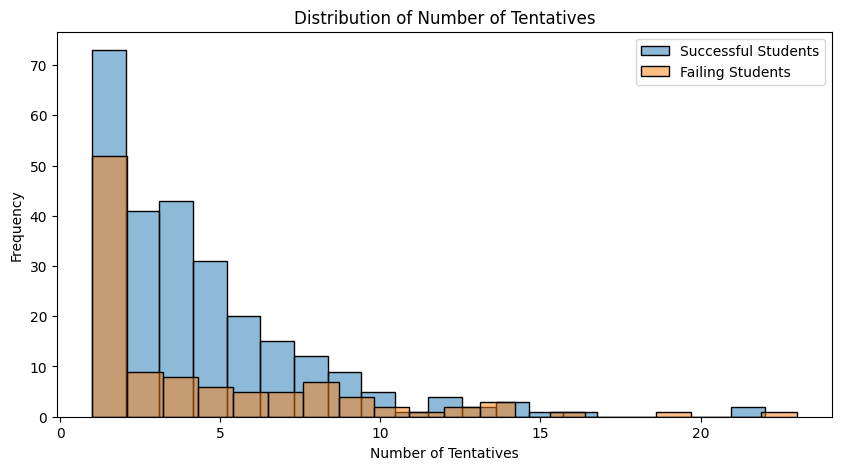

In [220]:
# Assuming your dataset is stored in a pandas DataFrame called 'data'
tentatives_successful = data_success_per_student['nb_tentative']
tentatives_failing = data_fail_per_student['nb_tentative']

# Create histograms for the number of tentatives
plt.figure(figsize=(10, 5))
sns.histplot(tentatives_successful, bins=20, label='Successful Students', alpha=0.5)
sns.histplot(tentatives_failing, bins=20, label='Failing Students', alpha=0.5)
plt.xlabel('Number of Tentatives')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tentatives')
plt.legend()
plt.show()

In [221]:
data_per_student = pd.concat([data_success_per_student, data_fail_per_student])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


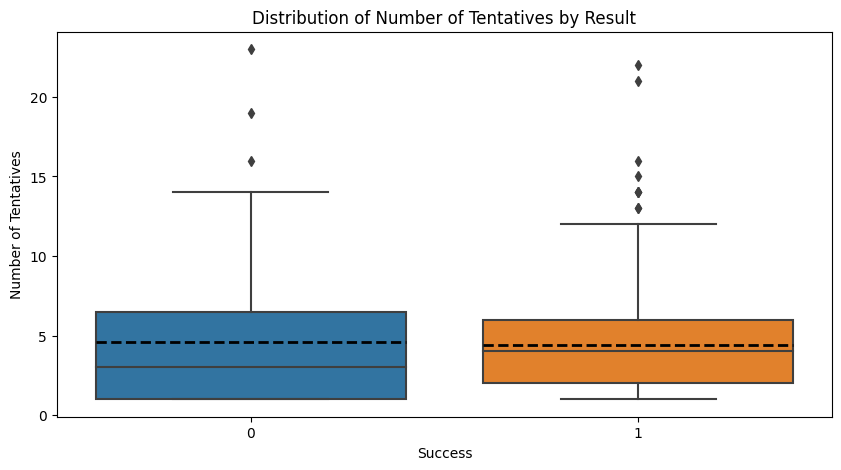

In [222]:
# Create box plots for the number of tentatives
plt.figure(figsize=(10, 5))
sns.boxplot(x='success', y='nb_tentative', data=data_per_student)

mean_successful = data_success_per_student['nb_tentative'].mean()
mean_failing = data_fail_per_student['nb_tentative'].mean()

plt.plot([-0.4, 0.4], [mean_successful, mean_successful], color='black', linestyle='--', linewidth=2, label='Mean Successful')
plt.plot([0.6, 1.4], [mean_failing, mean_failing], color='black', linestyle='--', linewidth=2, label='Mean Failing')

plt.xlabel('Success')
plt.ylabel('Number of Tentatives')
plt.title('Distribution of Number of Tentatives by Result')
plt.show()

In [223]:
from scipy.stats import mannwhitneyu

# Assuming 'tentatives_successful' and 'tentatives_failing' are arrays of number of tentatives
statistic, p_value = mannwhitneyu(tentatives_successful, tentatives_failing)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference between successful and failing students in terms of number of tentatives (p < 0.05)")
else:
    print("There is no significant difference between successful and failing students in terms of number of tentatives (p >= 0.05)")


There is a significant difference between successful and failing students in terms of number of tentatives (p < 0.05)


### Observe the number of errors per students 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

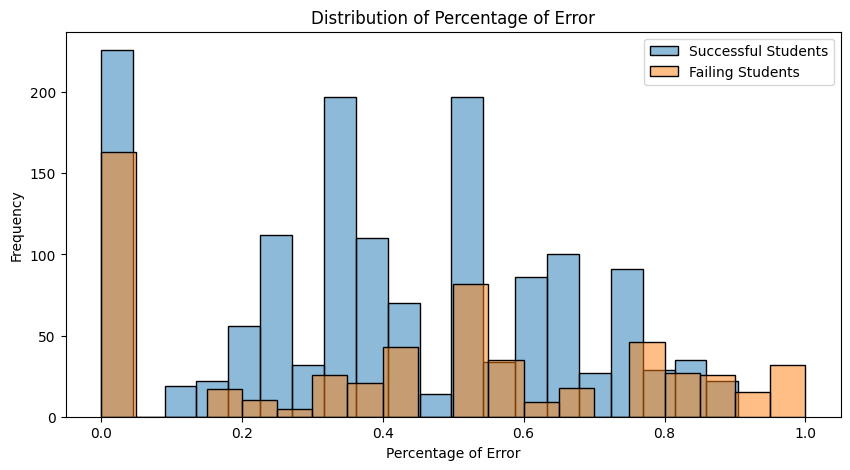

In [224]:
# plot distribution of percentage of error
plt.figure(figsize=(10, 5))

sns.histplot(data_success['pct_error'], bins=20, label='Successful Students', alpha=0.5)
sns.histplot(data_fail['pct_error'], bins=20, label='Failing Students', alpha=0.5)
plt.xlabel('Percentage of Error')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage of Error')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


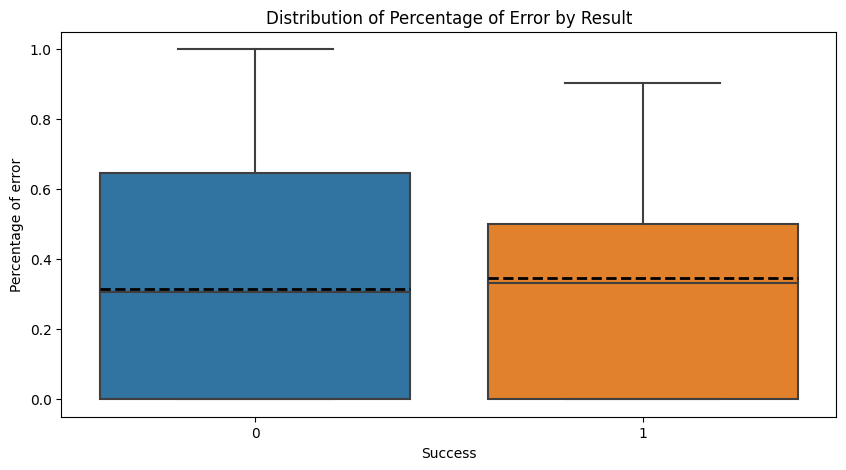

In [225]:
# Create box plots for the number of tentatives
plt.figure(figsize=(10, 5))
sns.boxplot(x='success', y='pct_error', data=data_per_student)

mean_successful = data_success_per_student['pct_error'].mean()
mean_failing = data_fail_per_student['pct_error'].mean()

plt.plot([-0.4, 0.4], [mean_successful, mean_successful], color='black', linestyle='--', linewidth=2, label='Mean Successful')
plt.plot([0.6, 1.4], [mean_failing, mean_failing], color='black', linestyle='--', linewidth=2, label='Mean Failing')

plt.xlabel('Success')
plt.ylabel('Percentage of error')
plt.title('Distribution of Percentage of Error by Result')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


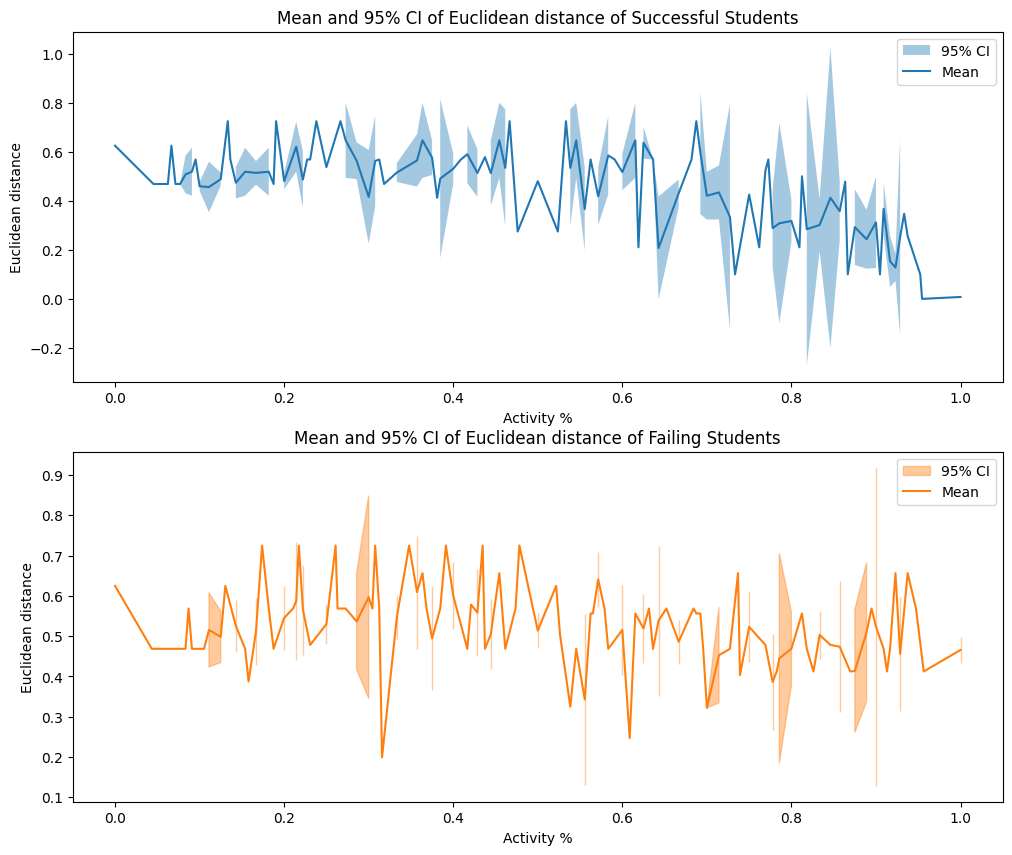

In [226]:
import matplotlib.pyplot as plt
from scipy import stats

# plot one figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

grouped_success = data_success.groupby("pct_activity")

# Calculate mean and 95% CI for "Jaro bars" metric
mean_values_bars_success = grouped_success["euclidean_distance"].mean()
ci_values_bars_success = grouped_success["euclidean_distance"].apply(lambda x: stats.sem(x, nan_policy='omit') * 1.96)  # 95% CI

# Fill between upper and lower CI
ax[0].fill_between(mean_values_bars_success.index, mean_values_bars_success - ci_values_bars_success, mean_values_bars_success + ci_values_bars_success, alpha=0.4, label="95% CI")

ax[0].plot(mean_values_bars_success.index, mean_values_bars_success, linestyle='-', label="Mean")
ax[0].set_xlabel("Activity %")
ax[0].set_ylabel("Euclidean distance")
ax[0].set_title("Mean and 95% CI of Euclidean distance of Successful Students")
ax[0].legend()

grouped_fail = data_fail.groupby("pct_activity")

# Calculate mean and 95% CI for "Jaro bars" metric
mean_values_bars_fail = grouped_fail["euclidean_distance"].mean()
ci_values_bars_fail = grouped_fail["euclidean_distance"].apply(lambda x: stats.sem(x, nan_policy='omit') * 1.96)  # 95% CI

# Fill between upper and lower CI
ax[1].fill_between(mean_values_bars_fail.index, mean_values_bars_fail - ci_values_bars_fail, mean_values_bars_fail + ci_values_bars_fail, alpha=0.4, color= '#ff7f0e', label="95% CI")

ax[1].plot(mean_values_bars_fail.index, mean_values_bars_fail, linestyle='-', color= '#ff7f0e', label="Mean")
ax[1].set_xlabel("Activity %")
ax[1].set_ylabel("Euclidean distance")
ax[1].set_title("Mean and 95% CI of Euclidean distance of Failing Students")
ax[1].legend()

plt.show()

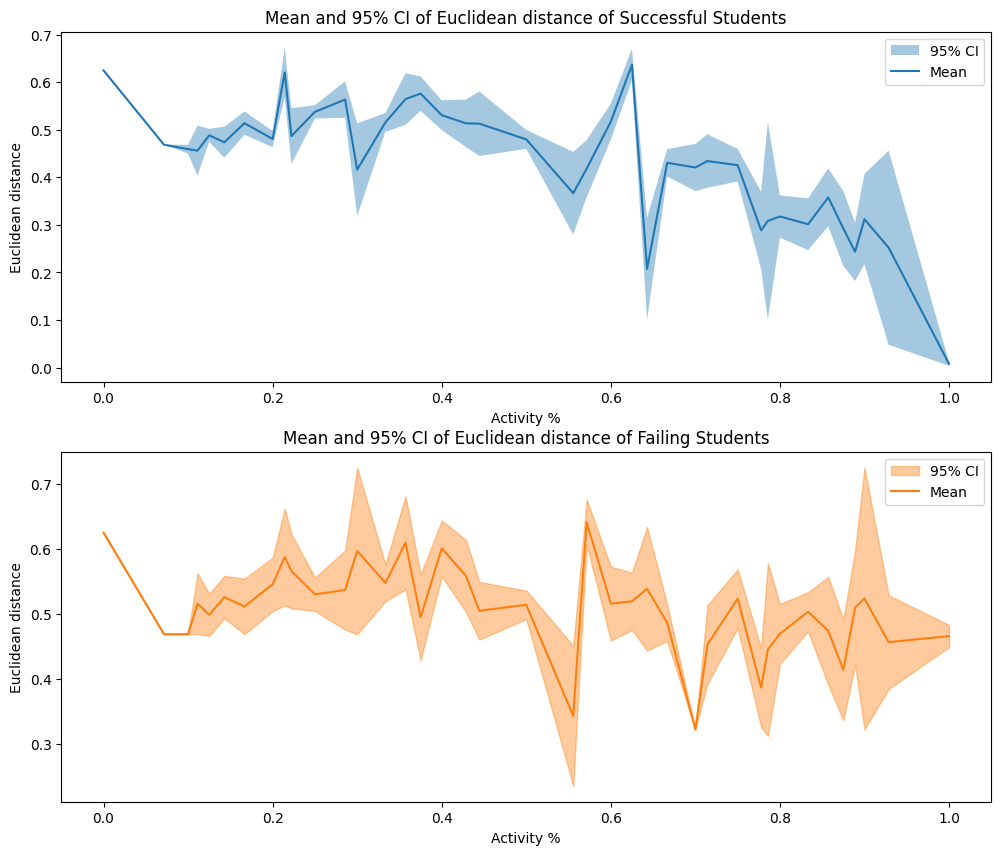

In [227]:
# plot one figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10))


grouped_success = data_success.groupby("pct_activity").agg({"euclidean_distance": ["mean", "sem"], "Student ID": "count"})
grouped_success.columns = ["euclidean_distance_mean", "euclidean_distance_sem", "count"]

# drop rows where euclidean_distance_mean is NaN
grouped_success = grouped_success.dropna(subset=["euclidean_distance_mean", "euclidean_distance_sem"])

grouped_success['ci_value'] = grouped_success["euclidean_distance_sem"] * 1.96

grouped_fail = data_fail.groupby("pct_activity").agg({"euclidean_distance": ["mean", "sem"], "Student ID": "count"})
grouped_fail.columns = ["euclidean_distance_mean", "euclidean_distance_sem", "count"]

# drop rows where euclidean_distance_mean is NaN
grouped_fail = grouped_fail.dropna(subset=["euclidean_distance_mean", "euclidean_distance_sem"])

grouped_fail['ci_value'] = grouped_fail["euclidean_distance_sem"] * 1.96

pct_success = grouped_success.index.to_list()
pct_fail = grouped_fail.index.to_list()

activity_percentage = set(pct_success).intersection(set(pct_fail))

grouped_success = grouped_success[grouped_success.index.isin(activity_percentage)].sort_index()
grouped_fail = grouped_fail[grouped_fail.index.isin(activity_percentage)].sort_index()

# Fill between upper and lower CI
ax[0].fill_between(grouped_success.index, grouped_success['euclidean_distance_mean'] - grouped_success['euclidean_distance_sem'], grouped_success["euclidean_distance_mean"] + grouped_success['euclidean_distance_sem'], alpha=0.4, label="95% CI")

ax[0].plot(grouped_success.index, grouped_success['euclidean_distance_mean'], linestyle='-', label="Mean")
ax[0].set_xlabel("Activity %")
ax[0].set_ylabel("Euclidean distance")
ax[0].set_title("Mean and 95% CI of Euclidean distance of Successful Students")
ax[0].legend()

ax[1].fill_between(grouped_fail.index, grouped_fail['euclidean_distance_mean'] - grouped_fail['euclidean_distance_sem'], grouped_fail["euclidean_distance_mean"] + grouped_fail['euclidean_distance_sem'], color= '#ff7f0e', alpha=0.4, label="95% CI")

ax[1].plot(grouped_fail.index, grouped_fail['euclidean_distance_mean'], color= '#ff7f0e', linestyle='-', label="Mean")
ax[1].set_xlabel("Activity %")
ax[1].set_ylabel("Euclidean distance")
ax[1].set_title("Mean and 95% CI of Euclidean distance of Failing Students")
ax[1].legend()

plt.show()

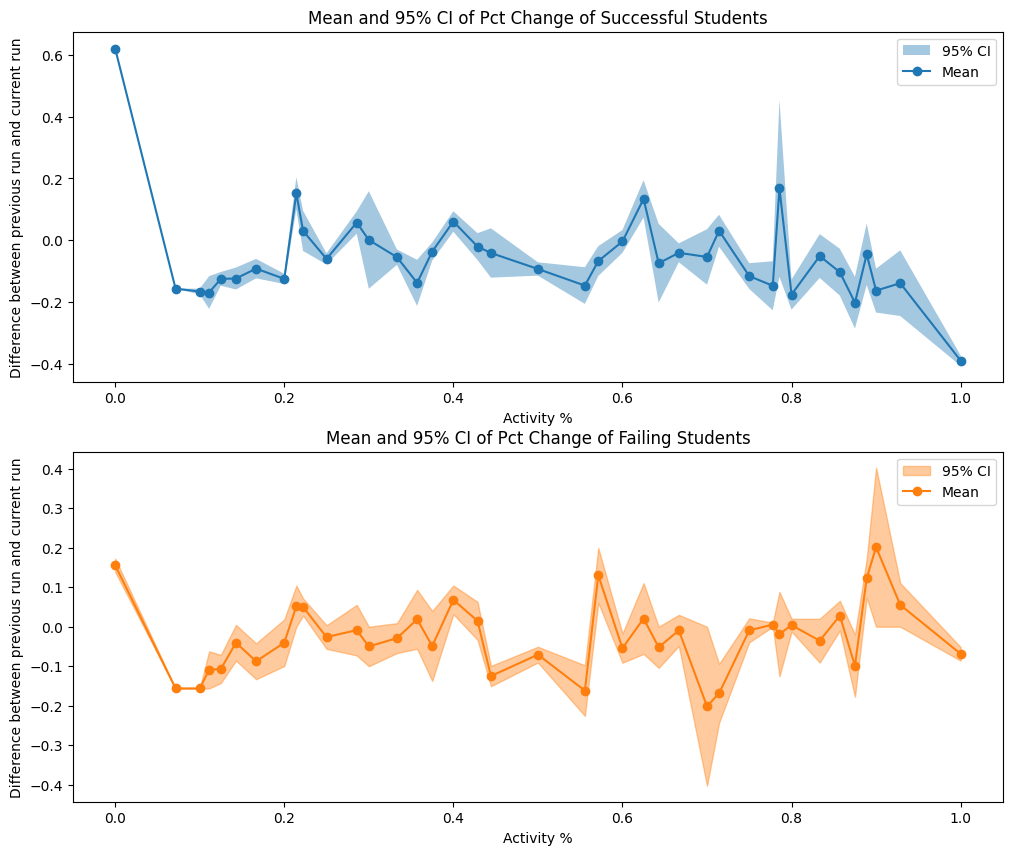

In [230]:
# plot one figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10))


grouped_success = data_success.groupby("pct_activity").agg({"delta": ["mean", "sem"], "Student ID": "count"})
grouped_success.columns = ["change_mean", "change_sem", "count"]

# drop rows where euclidean_distance_mean is NaN
grouped_success = grouped_success.dropna(subset=["change_mean", "change_sem"])

grouped_success['ci_value'] = grouped_success["change_sem"] * 1.96

grouped_fail = data_fail.groupby("pct_activity").agg({"delta": ["mean", "sem"], "Student ID": "count"})
grouped_fail.columns = ["change_mean", "change_sem", "count"]

# drop rows where euclidean_distance_mean is NaN
grouped_fail = grouped_fail.dropna(subset=["change_mean", "change_sem"])

grouped_fail['ci_value'] = grouped_fail["change_sem"] * 1.96

pct_success = grouped_success.index.to_list()
pct_fail = grouped_fail.index.to_list()

activity_percentage = set(pct_success).intersection(set(pct_fail))

grouped_success = grouped_success[grouped_success.index.isin(activity_percentage)].sort_index()
grouped_fail = grouped_fail[grouped_fail.index.isin(activity_percentage)].sort_index()

# Fill between upper and lower CI
ax[0].fill_between(grouped_success.index, grouped_success['change_mean'] - grouped_success['change_sem'], grouped_success["change_mean"] + grouped_success['change_sem'], alpha=0.4, label="95% CI")

ax[0].plot(grouped_success.index, grouped_success['change_mean'], linestyle='-', marker='o', label="Mean")
ax[0].set_xlabel("Activity %")
ax[0].set_ylabel("Difference between previous run and current run")
ax[0].set_title("Mean and 95% CI of Pct Change of Successful Students")
ax[0].legend()

ax[1].fill_between(grouped_fail.index, grouped_fail['change_mean'] - grouped_fail['change_sem'], grouped_fail["change_mean"] + grouped_fail['change_sem'], color= '#ff7f0e', alpha=0.4, label="95% CI")

ax[1].plot(grouped_fail.index, grouped_fail['change_mean'], color= '#ff7f0e', linestyle='-', marker='o', label="Mean")
ax[1].set_xlabel("Activity %")
ax[1].set_ylabel("Difference between previous run and current run")
ax[1].set_title("Mean and 95% CI of Pct Change of Failing Students")
ax[1].legend()

plt.show()

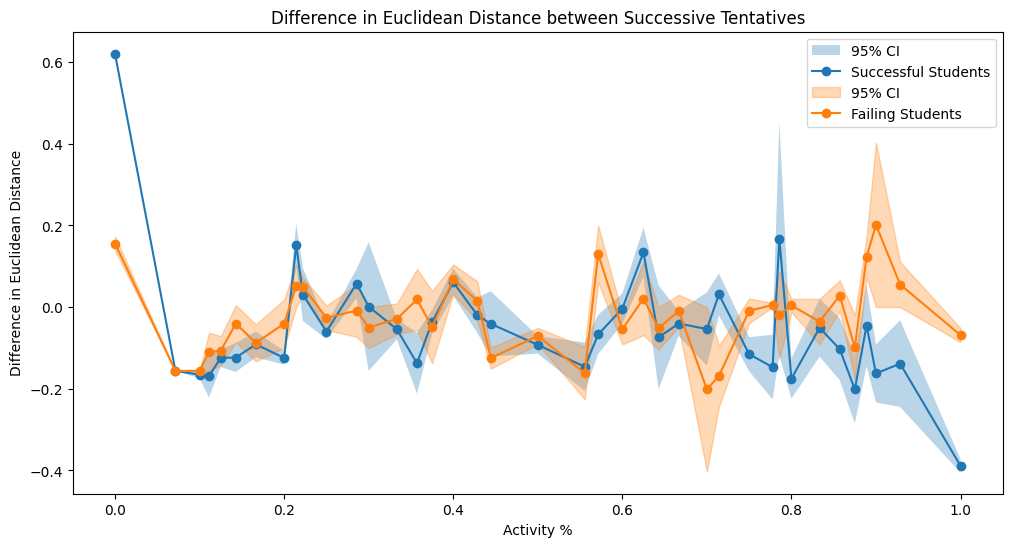

In [237]:
# plot one figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot change in Euclidean distance for successful students
ax.fill_between(grouped_success.index, grouped_success['change_mean'] - grouped_success['change_sem'], grouped_success["change_mean"] + grouped_success['change_sem'], alpha=0.3, label="95% CI")
ax.plot(grouped_success.index, grouped_success['change_mean'], linestyle='-', marker='o', label='Successful Students')

ax.fill_between(grouped_fail.index, grouped_fail['change_mean'] - grouped_fail['change_sem'], grouped_fail["change_mean"] + grouped_fail['change_sem'], color= '#ff7f0e', alpha=0.3, label="95% CI")
ax.plot(grouped_fail.index, grouped_fail['change_mean'], color= '#ff7f0e', linestyle='-', marker='o', label="Failing Students")

# Set labels and title
ax.set_xlabel('Activity %')
ax.set_ylabel('Difference in Euclidean Distance')
ax.set_title('Difference in Euclidean Distance between Successive Tentatives')
ax.legend()

plt.show()


In [239]:
data_success_per_nb_tentative = data_success.groupby('nb_tentative').agg({"euclidean_distance": ["mean", "sem", "count"]})
data_success_per_nb_tentative.columns = ["euclidean_distance_mean", "euclidean_distance_sem", "count"]

data_fail_per_nb_tentative = data_fail.groupby('nb_tentative').agg({"euclidean_distance": ["mean", "sem", "count"]})
data_fail_per_nb_tentative.columns = ["euclidean_distance_mean", "euclidean_distance_sem", "count"]